- Importing / Downloading relevant libraries
- Reading the given corpus file with Plain Text Corpus Reader

In [190]:
import nltk
#nltk.download()
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

corpus = PlaintextCorpusReader("corpora.zip",r".*\.*")

#nltk.download('stopwords')
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))


- 250 Sampled documents and 10 queries (used in earlier Assignment)

In [191]:
tophundred =[['GX076-73-9671657'], ['GX000-47-16664622'], ['GX246-79-13977676'], ['GX234-09-11837644'], ['GX044-20-2602695'], ['GX118-74-2093215'], ['GX238-04-12319787'], ['GX045-00-2313585'], ['GX006-35-1089672'], ['GX235-49-1853414'], ['GX022-91-4208711'], ['GX266-06-11290095'], ['GX001-83-6103749'], ['GX030-46-10656648'], ['GX272-03-0507928'], ['GX130-84-16036993'], ['GX067-39-0760978'], ['GX252-69-3511616'], ['GX017-08-6496610'], ['GX068-09-8808594'], ['GX234-65-0061241'], ['GX232-43-15916167'], ['GX152-90-15843322'], ['GX251-55-9721867'], ['GX235-14-15194987'], ['GX022-66-2133207'], ['GX033-74-11768205'], ['GX080-39-1799719'], ['GX000-64-5866723'], ['GX226-56-7245665'], ['GX267-18-5734917'], ['GX031-39-4910650'], ['GX262-66-14330191'], ['GX242-88-12802774'], ['GX266-38-8981287'], ['GX266-03-15444557'], ['GX252-77-13936202'], ['GX237-21-9143797'], ['GX271-37-7577511'], ['GX180-26-2527580'], ['GX050-22-12402240'], ['GX233-05-9583623'], ['GX260-95-16009459'], ['GX238-57-4348848'], ['GX268-12-6668448'], ['GX002-26-13752871'], ['GX269-73-3806430'], ['GX019-59-0927050'], ['GX255-77-14041569'], ['GX262-56-13887588'], ['GX057-87-6701199'], ['GX003-02-7881555'], ['GX062-61-6969183'], ['GX270-47-8433846'], ['GX124-47-14660533'], ['GX027-18-10108767'], ['GX066-25-2862428'], ['GX253-03-2644072'], ['GX160-97-14180874'], ['GX227-31-11982207'], ['GX268-17-14826284'], ['GX023-47-12204648'], ['GX066-24-15542843'], ['GX261-84-8988498'], ['GX236-12-10206301'], ['GX166-39-11518862'], ['GX004-39-10107773'], ['GX264-71-7429003'], ['GX051-70-13821495'], ['GX076-21-2157012'], ['GX010-43-13351164'], ['GX033-37-6910937'], ['GX251-93-6188233'], ['GX025-15-6373587'], ['GX046-89-2132993'], ['GX235-06-7810414'], ['GX054-19-10921158'], ['GX015-24-9993283'], ['GX226-84-15865269'], ['GX025-19-6143635'], ['GX000-77-6847828'], ['GX060-86-12683940'], ['GX237-13-3304514'], ['GX251-09-15641167'], ['GX018-07-8273149'], ['GX031-88-15781634'], ['GX054-69-5609826'], ['GX001-32-14918699'], ['GX016-50-3666937'], ['GX098-04-9007596'], ['GX131-24-6071984'], ['GX104-99-9877953'], ['GX245-23-5467402'], ['GX068-24-7570125'], ['GX230-14-13301582'], ['GX245-12-15484392'], ['GX229-50-13150686'], ['GX246-32-5710943'], ['GX046-25-14792040'], ['GX044-10-15979811'], ['GX027-18-3385268'], ['GX253-54-15104746'], ['GX023-34-7385049'], ['GX252-55-12761705'], ['GX007-60-13341075'], ['GX103-64-13700075'], ['GX030-71-15787453'], ['GX261-69-16733268'], ['GX064-67-4233620'], ['GX234-48-1061082'], ['GX251-35-16039127'], ['GX021-90-10239487'], ['GX263-52-0522987'], ['GX012-19-6427895'], ['GX231-53-10990040'], ['GX070-36-12424140'], ['GX067-10-6827896'], ['GX268-10-8952707'], ['GX006-34-4125034'], ['GX238-16-15902128'], ['GX002-67-12342105'], ['GX243-38-3872237'], ['GX235-44-13395478'], ['GX035-98-0922469'], ['GX266-69-16573983'], ['GX037-41-12009513'], ['GX008-71-9359930'], ['GX263-51-0953715'], ['GX082-58-15419589'], ['GX246-13-11532135'], ['GX089-15-8471339'], ['GX264-27-9780728'], ['GX008-73-8799753'], ['GX016-64-15836350'], ['GX253-13-2028661'], ['GX017-93-0483642'], ['GX047-40-12719561'], ['GX266-62-8151250'], ['GX045-98-13455252'], ['GX185-34-8765846'], ['GX010-38-10935242'], ['GX262-08-5685957'], ['GX267-57-14720787'], ['GX050-64-16681166'], ['GX009-93-8826706'], ['GX235-12-14963469'], ['GX192-57-2750479'], ['GX014-88-12762055'], ['GX234-97-11451211'], ['GX271-47-6079926'], ['GX039-03-11588197'], ['GX252-90-7072520'], ['GX014-42-16535232'], ['GX013-43-14423914'], ['GX070-50-15775402'], ['GX269-16-11472617'], ['GX001-07-10752136'], ['GX033-39-6253196'], ['GX239-12-11186677'], ['GX250-59-16700342'], ['GX007-11-9323667'], ['GX256-61-13295069'], ['GX001-37-2825497'], ['GX019-80-5095497'], ['GX046-71-7686865'], ['GX089-50-11510986'], ['GX012-86-3147424'], ['GX072-96-10747812'], ['GX139-09-11929540'], ['GX002-21-7842553'], ['GX066-08-5145977'], ['GX098-71-15002386'], ['GX011-81-10306672'], ['GX269-22-3624218'], ['GX041-30-11128623'], ['GX244-86-2532794'], ['GX031-45-14138043'], ['GX270-29-2037297'], ['GX012-43-0650616'], ['GX040-29-8619352'], ['GX010-49-1462037'], ['GX017-49-16216098'], ['GX253-06-14775839'], ['GX062-61-1338105'], ['GX002-57-5524313'], ['GX070-20-6909524'], ['GX133-83-0183692'], ['GX015-45-16339159'], ['GX019-33-11484591'], ['GX031-37-5671974'], ['GX256-47-3100554'], ['GX054-12-0846036'], ['GX020-38-11946255'], ['GX005-25-1803978'], ['GX009-33-12633954'], ['GX238-02-3365918'], ['GX269-38-9248488'], ['GX061-49-16061482'], ['GX017-68-13943308'], ['GX268-59-7472370'], ['GX008-59-16244161'], ['GX050-55-2137085'], ['GX006-11-13648004'], ['GX021-28-12863044'], ['GX263-52-7604187'], ['GX229-32-3006164'], ['GX260-13-11513072'], ['GX263-50-7322286'], ['GX017-66-16270474'], ['GX104-28-6788626'], ['GX108-27-5014609'], ['GX027-09-0083985'], ['GX066-55-7618225'], ['GX235-93-6814575'], ['GX120-62-9606015'], ['GX012-00-16749717'], ['GX011-27-9771637'], ['GX033-50-9898679'], ['GX229-00-12540928'], ['GX260-46-8634545'], ['GX014-94-1782160'], ['GX016-57-14337495'], ['GX230-16-3711335'], ['GX050-39-10411277'], ['GX068-78-2137752'], ['GX226-45-0230910'], ['GX085-52-8905384'], ['GX251-23-0130240'], ['GX006-96-14383474'], ['GX041-49-14190742'], ['GX012-94-0685684'], ['GX062-35-0543954'], ['GX016-16-2824629'], ['GX056-80-8507274'], ['GX055-07-6092381'], ['GX264-58-2764191'], ['GX234-88-15442725'], ['GX262-70-3482225'], ['GX241-70-14423465'], ['GX012-61-3658271'], ['GX059-73-7663509'], ['GX021-13-8007606'], ['GX012-72-14266289'], ['GX016-68-0366659'], ['GX261-72-1094793'], ['GX246-49-12699220'], ['GX000-81-0219756'], ['GX005-08-2573669'], ['GX236-15-7664287'], ['GX233-57-9641546']]

In [192]:
topqueries=[['737  allegations made enrons culpability california energy crisis'], ['727  identify specific instances church arson'], ['715  organizations private governmental developing drugs combat schizophrenia'], ['702  pearl farming operations actual farming operations described culturing pearls japanese pearl productions status pearl farming production'], ['755  history location scottish highland games united states'], ['709  limits regulations concerning jockey weight horse racing'], ['723  governments definition executive privilege'], ['705  identify efforts proposed undertaken world governments seek reduction iraqs foreign debt'], ['737  allegations made enrons culpability california energy crisis'], ['701  describe history oil industry']]

In [193]:
hundredtop=[]
for t in tophundred:
    hundredtop.append(t[0])

- Tokenizing the textual input for the task
- Removal of stop words & changing it to lower case characters 

In [194]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[a-zA-Z@]+")

In [195]:
def filter_words(word_list):
    useful_words = [w for w in word_list if w not in sw]
    return useful_words

In [196]:
def myTokenizer(sentence):
    words = tokenizer.tokenize(sentence.lower())
    return filter_words(words) #Filter out the stopwords

- Formatting the queries into relevant words for further processing 


In [197]:
queryIDlist=[]
queriesList=[]
class putIntoDict(object):
    def __init__(self,query):
        self.query = query
        self.qlist=[]
        dumm=[]
        for qid in query :
            self.qlist=qid.split(" ")
            queryIDlist.append(self.qlist[0])
            for x in range(0,len(self.qlist)) :
                if self.qlist[x].isalpha():
                    dumm.append(self.qlist[x])
            queriesList.extend(dumm)
            dumm.clear()

In [198]:
outputdict={}
class separateOutput(object) :
    def getoutput(outputlist):
        for i in outputlist:
            temp=[]
            temp=i.split(" ")
            if temp[0] in outputdict.keys():
                t=[]
                t=outputdict.get(temp[0])
                t.append(temp[1])
                outputdict.update({temp[0]:t})
                
            else :
                docli=[]
                docli.append(temp[1])
                outputdict.update({temp[0]:docli})

In [199]:
filename2="output.txt"
outputans = [line.rstrip('\n') for line in open(filename2)]
separateOutput.getoutput(outputans)

- Bag of Words model for TFIDF calculation ( combining all unique words in a set for all docs )

In [200]:
pathval="corpora.zip"
modfinal=[]
finlist=[]
new_corpus=[]
i=0
wordSet=set()
for val in range(0,250) :
    a = str(hundredtop[val])
    newcorpus = PlaintextCorpusReader(pathval,a)  
    string = ""
    finlist.insert(i,newcorpus.words())
    i+=1
    for k in newcorpus.words():
        string = string + " " + k
    temp1=myTokenizer(string)

    new_corpus.append(temp1)
    bagofWords=temp1
    wordSet=set(wordSet).union(set(bagofWords))


wordSetAsList=list(wordSet)
#print(len(wordSet))
#print(len(wordSetAsList))

In [201]:
#print(len(new_corpus))

- Creating List of Dictionaries for term - frequency mapping  (for all docs )

In [202]:
#dummylist=[]
termfreqlist=[]

for i in range(0,250):
    #dummylist=[]
    wordDict = dict.fromkeys(wordSet, 0)
#     for j in range(len(wordSetAsList)):
#         dummylist.append(0)
    for word in new_corpus[i] :  
#         idx=wordSetAsList.index(word)
#         print(idx)
        wordDict[word]+=1
    #print(dummylist)    
    termfreqlist.append(wordDict)
    #dummylist.clear()

- Storing the results in dataframe for systematic representation

In [203]:
dftermfreq=pd.DataFrame()
for i in range(0,250):
    dftermfreq=dftermfreq.append(termfreqlist[i],ignore_index=True)
dftermfreq.head()

,@,aa,aaa,aaai,aac,aacc,aade,aadhamiya,aaf,aafes,...,zrebiec,zucarelli,zuccarelli,zuckerman,zuni,zurek,zurich,zuru,zylko,zyzanski
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


- Calculations for Raw Term Frequency Model 

In [204]:
results = []

for j in topqueries:
    results_rawFreq = []
    results_doc_id = []
    for i in range(250):
        results_rawFreq.append(0)
        results_doc_id.append(i)
    query = j
    query = tokenizer.tokenize(str(query))
    for q in query:
        for doc in range(0,250):
            try:
                results_rawFreq[doc]=results_rawFreq[doc]+dftermfreq.at[doc,q]
            except KeyError:
                pass
            except ValueError:
                pass
        sorted_result = [x for _,x in sorted(zip(results_rawFreq,results_doc_id),reverse=True)]
    results.append(sorted_result)

- Modules for computing TF , IDF and TFIDF manually (as per the assignment question ) with dictionary , bag of words in place


In [205]:
def computeTF(word_Dict, bow):
    import math
    tfDict = {}
    #bowCount = len(bow) 
    for word, count in word_Dict.items(): 
        if count > 0 :
            tfDict[word] = math.log(count,10)
        else :
            tfDict[word] = 0
    return tfDict

In [206]:
def computeIDF(docList):
    import math
    idfDict = {}
    N = len(docList)
    #Counts the number of documents that contain a word w
    idfDict = dict.fromkeys(docList[0].keys(),0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] +=1
            #Divide N by denominator above, take the log of that
    for word, val in idfDict.items():
        idfDict[word]= math.log(N / float(val),10)
    return idfDict

In [207]:
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val * idfs[word]
    return tfidf

- Function call for above TF module

In [208]:
tfbow=[]
for i in range(0,250) :
    tfTemp=computeTF(termfreqlist[i], new_corpus[i])
    tfbow.append(tfTemp)

-  Function call for above IDF module

In [209]:

# for i in range(0,250) :
idfbow=computeIDF(termfreqlist)


In [210]:
type(tfbow[i])
type(idfbow)

dict

- Function call for above TFIDF module
- Storing the final results in a dataframe

In [211]:

dffinal=pd.DataFrame()
tfidflist=[]
for i in range(0,250) :
    temptfidf=computeTFIDF(tfbow[i], idfbow)
    tfidflist.append(temptfidf)
    dffinal=dffinal.append(temptfidf,ignore_index=True)
    

In [212]:

#print(dffinal.head())



In [213]:
dffinal.head()

,@,aa,aaa,aaai,aac,aacc,aade,aadhamiya,aaf,aafes,...,zrebiec,zucarelli,zuccarelli,zuckerman,zuni,zurek,zurich,zuru,zylko,zyzanski
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.081228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Compute top document ids based on TFIDF per query

In [214]:
resultsTFIDF = []

for j in topqueries:
    results_tfidf = []
    results_doc_id1 = []
    for i in range(250):
        results_tfidf.append(0)
        results_doc_id1.append(i)
    query = j
    query = tokenizer.tokenize(str(query))
    for q in query:
        for doc in range(0,250):
            try :
                results_tfidf[doc]=results_tfidf[doc]+dffinal.at[doc,q]
            except KeyError:
                pass
            except ValueError:
                pass
        sorted_result = [x for _,x in sorted(zip(results_tfidf,results_doc_id1),reverse=True)]
    resultsTFIDF.append(sorted_result)

- Question 1: Computing Precision and Recall for Raw Term Frequency Model

In [215]:
class relevancecheckRawFreq(object):
    def checkRelevant(queryid):
        templist=outputdict.get(queryid[0])
        intersectans=set(templist).intersection(hundredtop)
        return intersectans
    
    def getRelevantRetrieved(rel,k,queryno):
        temp1=[]
        for i in range(0,k):
            temp1.append(hundredtop[results[queryno][i]])
            
        intersectans2=set(temp1).intersection(rel)
            
      
        return len(intersectans2)

    def calculateMetrics(a,b):
        return a/float(b)

In [216]:
class relevancecheck(object):
    def checkRelevant(queryid):
        templist=outputdict.get(queryid[0])
        intersectans=set(templist).intersection(hundredtop)
        return intersectans
    
    def getRelevantRetrieved(rel,k,queryno):
        temp1=[]
        for i in range(0,k):
            temp1.append(hundredtop[resultsTFIDF[queryno][i]])
            
        intersectans2=set(temp1).intersection(rel)
            
      
        return len(intersectans2)

    def calculateMetrics(a,b):
        return a/float(b)

In [217]:
print("Precision Recall : Raw Frequency")

Precision Recall : Raw Frequency


In [218]:
p=0
for i in topqueries :
    queryIDlist.clear()
    queriesList.clear()
    putIntoDict(i)
    relevantList=[]
    relevantList=relevancecheckRawFreq.checkRelevant(queryIDlist)
    relevant=len(relevantList)
    for sq in range(5,16,5) :
        print("k:",sq)
        relevantretrieved=relevancecheckRawFreq.getRelevantRetrieved(relevantList,sq,p)

        precision=relevancecheckRawFreq.calculateMetrics(relevantretrieved,sq)
        if relevant != 0:
            recall=relevancecheckRawFreq.calculateMetrics(relevantretrieved,relevant)
            print(recall)
        else:    
            print(0)
        
        print(precision)

        #relevantqlist.clear()
    print("\n")

k: 5
0.0
0.0
k: 10
0.5
0.1
k: 15
1.0
0.13333333333333333


k: 5
0.0
0.0
k: 10
0.0
0.0
k: 15
0.0
0.0


k: 5
0
0.0
k: 10
0
0.0
k: 15
0
0.0


k: 5
0.0
0.0
k: 10
0.0
0.0
k: 15
0.0
0.0


k: 5
0.0
0.0
k: 10
0.0
0.0
k: 15
0.0
0.0


k: 5
0.25
0.2
k: 10
0.25
0.1
k: 15
0.25
0.06666666666666667


k: 5
0.0
0.0
k: 10
0.0
0.0
k: 15
1.0
0.06666666666666667


k: 5
0.0
0.0
k: 10
0.0
0.0
k: 15
0.0
0.0


k: 5
0.0
0.0
k: 10
0.5
0.1
k: 15
1.0
0.13333333333333333


k: 5
0.0
0.0
k: 10
0.0
0.0
k: 15
0.0
0.0




- Comparison of Precision Recall (Assignment 1 - without lingusitic model) v/s Precision Recall in Question 1 (Raw Term Frequency Model) : 


- In case of Assignment 1 - most relevant doc ids were calculated based on how many terms in the query are present in the document (without considering their frequencies). As a result a spam page with 1 term repeated had same weightage as that of a page consisting of the same term once. 


- In case of Raw Term Frequency model, term - frequency mapping is used to find the most relevant doc ids. As a result, the output is governed by high or low frequencies of term instead of actual relevance. For instance, a doc with a particular term appearing once will have less weightage than a spam page with the same term repeated several times. Thus, even if a doc has more number of matching terms to the query ,  another document with a single term repeated is ranked higher.


- The above is proven with the results of Precision and Recall in Assignment 1 , Assignment 2 (Task 1) where Raw Term Frequency Model performed significantly poor.


- Question 2 : Computing Precision Recall based on TFIDF 

In [219]:
print("Precision Recall : TFIDF")

Precision Recall : TFIDF


In [220]:
p=0
for i in topqueries :
    queryIDlist.clear()
    queriesList.clear()
    putIntoDict(i)
    relevantList=[]
    relevantList=relevancecheck.checkRelevant(queryIDlist)
    relevant=len(relevantList)
    for sq in range(5,16,5) :
        print("k:",sq)
        relevantretrieved=relevancecheck.getRelevantRetrieved(relevantList,sq,p)

        precision=relevancecheck.calculateMetrics(relevantretrieved,sq)
        if relevant != 0:
            recall=relevancecheck.calculateMetrics(relevantretrieved,relevant)
            print(recall)
        else:    
            print(0)

        print(precision)

        
    print("\n")

k: 5
1.0
0.4
k: 10
1.0
0.2
k: 15
1.0
0.13333333333333333


k: 5
0.0
0.0
k: 10
0.0
0.0
k: 15
0.0
0.0


k: 5
0
0.0
k: 10
0
0.0
k: 15
0
0.0


k: 5
0.0
0.0
k: 10
0.0
0.0
k: 15
0.0
0.0


k: 5
0.0
0.0
k: 10
0.0
0.0
k: 15
0.0
0.0


k: 5
0.0
0.0
k: 10
0.0
0.0
k: 15
0.0
0.0


k: 5
1.0
0.2
k: 10
1.0
0.1
k: 15
1.0
0.06666666666666667


k: 5
0.0
0.0
k: 10
0.3333333333333333
0.1
k: 15
0.3333333333333333
0.06666666666666667


k: 5
1.0
0.4
k: 10
1.0
0.2
k: 15
1.0
0.13333333333333333


k: 5
0.0
0.0
k: 10
0.0
0.0
k: 15
0.25
0.06666666666666667




- Comparison of Precision Recall (TFIDF) v/s Precision Recall in Question 1 (Raw Term Frequency Model)


- In case of Task 2( TFIDF ), the documents with one term  repeated several times get lower scores as compared to the term present less number of times (log frequency weighting of TF per doc). It also takes into account the presence of rare terms ( documents with rare terms have a higher score ) - idf. These two terms' combined score ,that is, TFIDF gives the top relevant doc ids


- As compared to the Raw Term Frequency Model , the TFIDF method performs better as it is not skewed by the raw frequencies alone and takes into account other factors mentioned above.


- The above claim is proven by the trend seen in the precision and recall values for these two methods

- KMeans with Euclidean distance ( k ranging from 2 to 40 )

In [221]:

sse=[]
silScores=[]
list_k = list(range(2, 41,2))

for n_clusters in range(2, 41,2) :
    kmeans_model = KMeans(n_clusters, max_iter=200)
    kmeans_model.fit(dffinal)
    sse.append(kmeans_model.inertia_)
    labels = kmeans_model.labels_
    
    silScores.append(metrics.silhouette_score(dffinal, labels, metric='euclidean'))

In [222]:
print(len(list_k))
print(len(sse))
print(len(silScores))

20
20
20


- Visualizing number of clusters (k) and SSE ( measure of intra-cluster distance relative to inner-cluster distance) to compute best "K" (Elbow method)

Text(0, 0.5, 'Sum of squared distance')

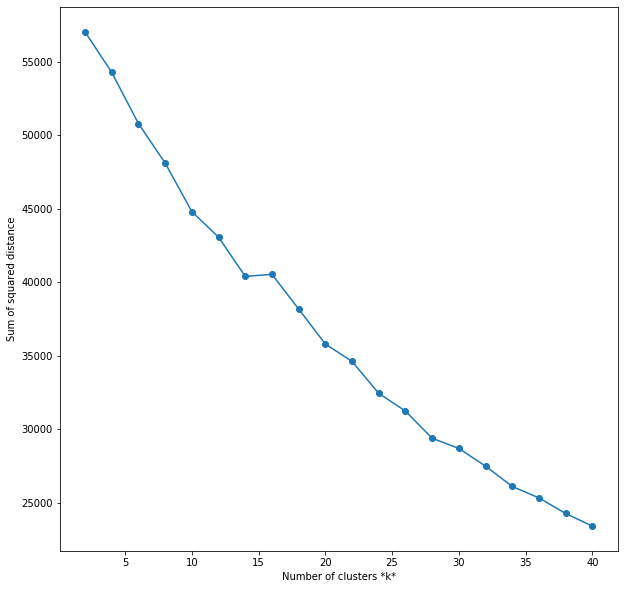

In [223]:
plt.figure(figsize=(10, 10))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [224]:
# plt.figure(figsize=(10, 10))
# plt.plot(list_k, silScores, '-o')
# plt.xlabel(r'Number of clusters *k*')
# plt.ylabel('silhouette_score ')

- Selecting k based on above graph
- Displaying the clusters of documents in form of list ( Task 3(a) and 4(a) )

In [225]:
kmeans_model_final = KMeans(26, max_iter=200)
kmeans_model_final.fit(dffinal)
clusters = kmeans_model_final.labels_.tolist()
print("Cluster labels")
print(clusters)
print("\n")
centroids = kmeans_model_final.cluster_centers_
print("Centroids")
print(centroids)

Cluster labels
[11, 11, 11, 11, 19, 11, 20, 11, 11, 18, 11, 11, 11, 11, 11, 8, 11, 11, 15, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 24, 11, 11, 11, 11, 11, 11, 11, 11, 23, 11, 11, 11, 6, 11, 11, 11, 11, 11, 17, 11, 11, 11, 11, 11, 11, 11, 11, 11, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 5, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 14, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 9, 11, 11, 25, 11, 11, 11, 11, 11, 11, 11, 11, 22, 11, 11, 13, 11, 11, 11, 11, 11, 11, 2, 1, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 3, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 11, 11, 11, 11, 11, 11, 11, 11, 16, 11, 11, 11, 0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 0, 11, 11, 11, 11, 11, 0, 11, 11, 11, 11, 11, 11, 11, 4, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 21, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 

- Computing Cosine Similarity

In [226]:
from sklearn.metrics.pairwise import cosine_similarity
cos = cosine_similarity(dffinal)
print(type(cos))
print(cos.shape)

<class 'numpy.ndarray'>
(250, 250)


- KMeans based on Cosine Similarity

In [227]:

sse2=[]
list_k = list(range(2, 41,2))

for n_clusters in range(2, 41,2) :
    kmeans_model = KMeans(n_clusters, max_iter=200)
    kmeans_model.fit(cos)
    sse2.append(kmeans_model.inertia_)

- Visualizing number of clusters (k) and SSE ( measure of intra-cluster distance relative to inner-cluster distance) to compute best "K" (Elbow method) 

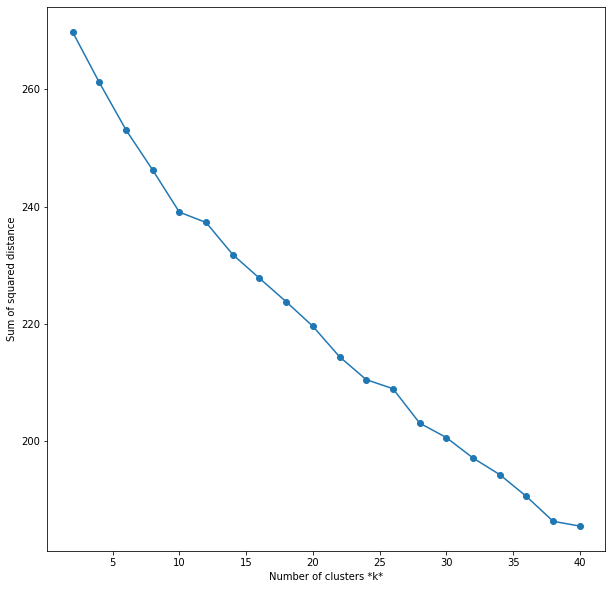

In [228]:
plt.figure(figsize=(10, 10))
plt.plot(list_k, sse2, '-o')

plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

- Select best "k" 
- Displaying clusters in the form of list

In [229]:
kmeans_model_final = KMeans(24, max_iter=200)
kmeans_model_final.fit(cos)
clusters = kmeans_model_final.labels_.tolist()
print("Cluster Labels")
print(clusters)
print("\n")
centroids = kmeans_model_final.cluster_centers_
print("Centroids")
print(centroids)

Cluster Labels
[5, 2, 2, 19, 3, 13, 17, 9, 6, 3, 0, 19, 10, 8, 8, 8, 20, 2, 23, 22, 9, 13, 5, 16, 16, 19, 15, 14, 4, 0, 6, 7, 15, 4, 16, 1, 9, 3, 1, 4, 8, 4, 1, 4, 0, 20, 23, 19, 8, 6, 3, 2, 13, 23, 6, 2, 12, 6, 13, 20, 8, 23, 12, 19, 6, 5, 4, 9, 14, 2, 14, 14, 6, 16, 9, 3, 3, 9, 10, 16, 1, 4, 9, 3, 22, 2, 10, 1, 4, 13, 5, 4, 11, 7, 18, 8, 9, 16, 13, 23, 13, 1, 22, 22, 4, 14, 13, 19, 11, 2, 23, 1, 4, 0, 9, 9, 3, 2, 4, 6, 9, 7, 6, 16, 2, 4, 16, 14, 19, 0, 10, 0, 18, 0, 1, 4, 4, 19, 15, 6, 13, 8, 3, 13, 22, 8, 2, 4, 4, 14, 7, 19, 7, 6, 13, 13, 3, 16, 4, 2, 16, 3, 15, 14, 3, 11, 4, 22, 20, 7, 13, 14, 7, 23, 14, 20, 16, 21, 3, 10, 19, 1, 8, 10, 17, 4, 5, 4, 10, 2, 9, 8, 4, 4, 20, 11, 21, 4, 13, 2, 2, 13, 0, 13, 6, 10, 4, 19, 4, 1, 14, 13, 15, 10, 5, 2, 13, 11, 4, 6, 3, 20, 2, 19, 18, 14, 2, 0, 0, 13, 0, 18, 19, 17, 13, 2, 1, 6, 4, 10, 22, 20, 10, 9, 11, 13, 2, 10, 4, 13]


Centroids
[[0.02508031 0.01303863 0.00370223 ... 0.03246875 0.01040496 0.0231339 ]
 [0.00400522 0.01766107 0.02296644 

- Agglomerative Clustering ( Single Linkage )
- Visualizing Dendogram for the same

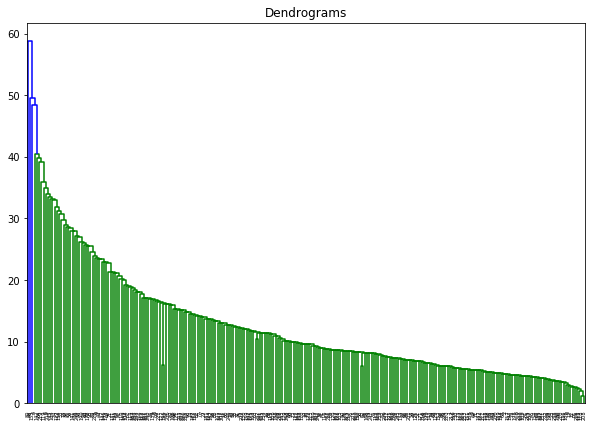

In [230]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(dffinal, method='single'),
                      orientation='top',
                      #labels=labelList,
                      distance_sort='descending',
                      show_leaf_counts=True)

- Agglomerative Clustering ( Complete Linkage )
- Visualizing Dendogram for the same

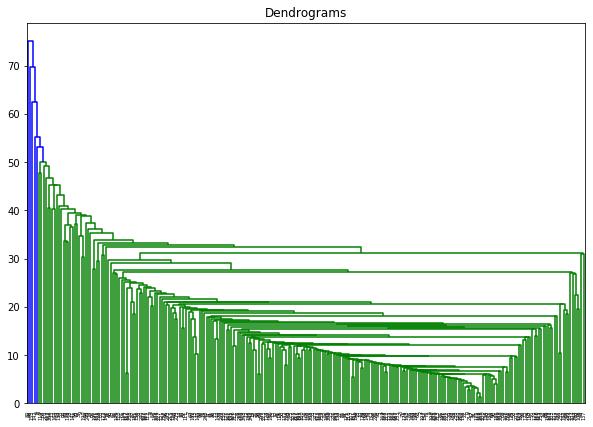

In [231]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(dffinal, method='complete'),
                     orientation='top',
                     #labels=labelList,
                     distance_sort='descending',
                     show_leaf_counts=True)

- Agglomerative Clustering ( Average Linkage )
- Visualizing Dendogram for the same

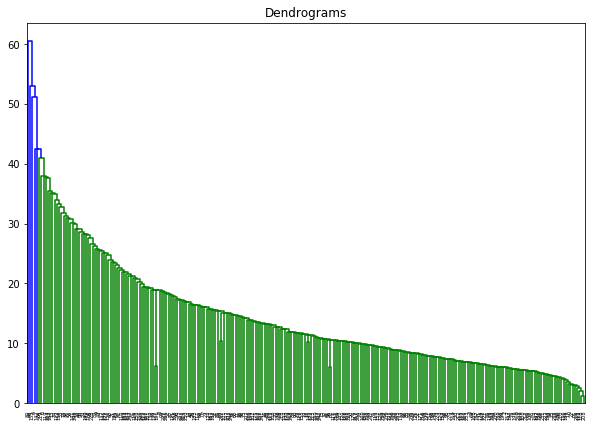

In [232]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(dffinal, method='average'),
                     orientation='top',
            #labels=labelList,
                     distance_sort='descending',
                     show_leaf_counts=True)

- Agglomerative Clustering ( Ward's Method )
- Visualizing Dendogram for the same

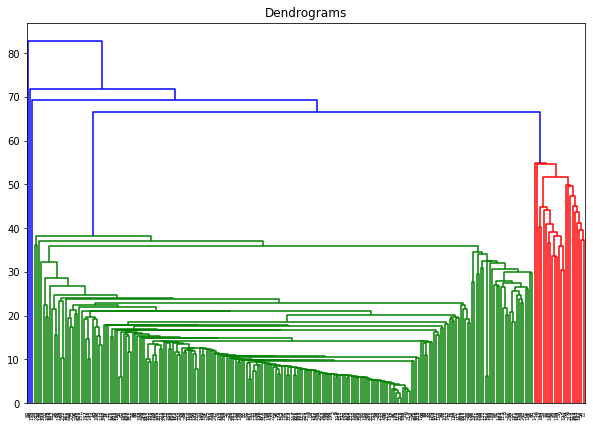

In [233]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(dffinal, method='ward'),
                     orientation='top',
            #labels=labelList,
                     distance_sort='descending',
                     show_leaf_counts=True)